In [1]:
# import libraries
import pandas as pd
import numpy as np# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In [9]:


# Had the same problem got it to work thanks to Muthukumaran. Just make Muthukumaran answer more clear.

# Follow these steps:

import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git



In [10]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# check the data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype('float64')# check dtypes after the fix
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot: >

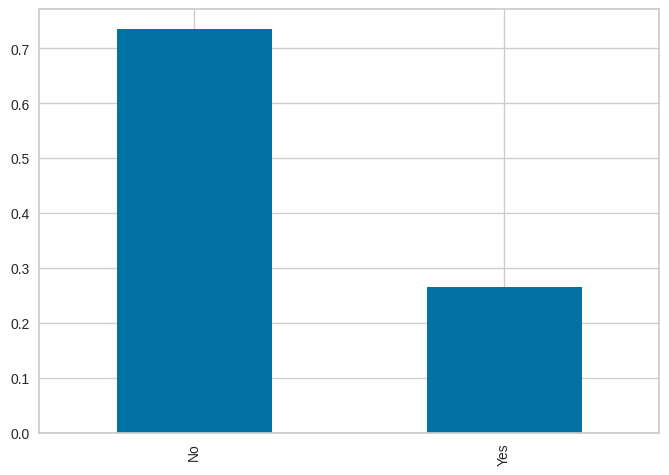

In [14]:
# check the target balance
data['Churn'].value_counts(normalize = True).plot.bar()

In [15]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'Churn', session_id = 123, ignore_features = ['customerID'], log_experiment = True, experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [16]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8022,0.8472,0.5276,0.6595,0.5849,0.4575,0.4632,0.3400
lr,Logistic Regression,0.8020,0.8442,0.5451,0.6542,0.5941,0.4646,0.4684,0.5010
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.5283,0.6552,0.5839,0.4550,0.4602,0.4890
ridge,Ridge Classifier,0.7994,0.0000,0.5191,0.6555,0.5787,0.4494,0.4552,0.1770
catboost,CatBoost Classifier,0.7974,0.8407,0.5207,0.6481,0.5761,0.4453,0.4508,2.4260
lda,Linear Discriminant Analysis,0.7968,0.8374,0.5543,0.6355,0.5916,0.4572,0.4595,0.2020
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.5330,0.6226,0.5733,0.4356,0.4385,0.3250
rf,Random Forest Classifier,0.7876,0.8218,0.4955,0.6270,0.5524,0.4160,0.4215,0.4590
xgboost,Extreme Gradient Boosting,0.7870,0.8252,0.5345,0.6142,0.5706,0.4301,0.4326,0.4890
et,Extra Trees Classifier,0.7682,0.7922,0.4664,0.5798,0.5159,0.3661,0.3704,0.4700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [17]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)


In [18]:
# save pipeline
save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None...
                                                                     'TechSupport',
                                                                     'StreamingTV',
                                                                     'StreamingMovies',
                   

In [1]:
from pycaret.classification import *

In [2]:
# load pipeline from file
my_pipeline = load_model('my_first_pipeline')# sklearn settings to render diagram
from sklearn import set_config
set_config(display = 'diagram')# display pipeline
print(my_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['gender', 'Partner', 'Dependent...
                                             'StreamingTV', 'StreamingMovies',
                                             'Contract', 'PaymentMethod'],
                                    transformer=OneHotEncoder(cols=['MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecuri

In [4]:
# load pipeline from file
my_pipeline = load_model('my_first_pipeline')# sklearn settings to render diagram
from sklearn import set_config
set_config(display = 'diagram')# display pipeline
print(my_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['gender', 'Partner', 'Dependent...
                                             'StreamingTV', 'StreamingMovies',
                                             'Contract', 'PaymentMethod'],
                                    transformer=OneHotEncoder(cols=['MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecuri

In [ ]:
# start the mlflow ui
!mlflow ui

[2023-03-20 20:06:51 +0100] [8225] [INFO] Starting gunicorn 20.1.0
[2023-03-20 20:06:51 +0100] [8225] [INFO] Listening at: http://127.0.0.1:5000 (8225)
[2023-03-20 20:06:51 +0100] [8225] [INFO] Using worker: sync
[2023-03-20 20:06:51 +0100] [8227] [INFO] Booting worker with pid: 8227
